In [1]:
# Add root directory of project to sys path so that Jupyter notebook can import from root/src/..
import sys
import os

# Get the absolute path of the parent directory of the current notebook
notebook_dir = os.path.abspath('')
project_root = os.path.dirname(notebook_dir)  # Assumes the notebook is in root/notebooks

# Add the project root to the sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
# imports
import wave # standard available in Python >2.x
import numpy as np

from src.utils.audio_processor import AudioProcessor
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [3]:
# Open the .wav file
with wave.open('../data/audio_samples/synth_sample_1.wav', 'r') as wav_file:
    # Get the sampling rate
    sampling_rate = wav_file.getframerate()
    print(f"The sampling rate is: {sampling_rate} Hz")
    
    # Extract audio frames
    signal = wav_file.readframes(wav_file.getnframes())
    
    # Convert audio frames to numpy array
    # The 'np.frombuffer' function is used to interpret the byte data as an array.
    # The 'dtype' argument depends on the number of bytes per sample, which can be determined by 'wav_file.getsampwidth()'
    #  MDJ: print(wav_file.getsampwidth()): 2, i.e., 2 bytes = 16bits
    # 'np.int16' is commonly used for 16-bit audio files, adjust as needed.
    waveform = np.frombuffer(signal, dtype=np.int16) # for stereo this returns: [L1, R1, L2, R2, ...] 

    # If the audio file is stereo (2 channels), you might want to reshape the array
    if wav_file.getnchannels() == 2:
        waveform_reshaped = np.reshape(waveform, (-1, 2)) # now we get stereo like this: [ [L1, R1], [L2, R2], ... ]
        waveform_mono_avg = waveform_reshaped.mean(axis=1) # results in [(L1+R1)/2, (L2+R2)/2, ...]
        waveform_mono_sum = waveform_reshaped.sum(axis=1) # results in [L1+R1, L2+R2, ...]

# Now 'waveform' is a numpy array containing the audio data

The sampling rate is: 44100 Hz


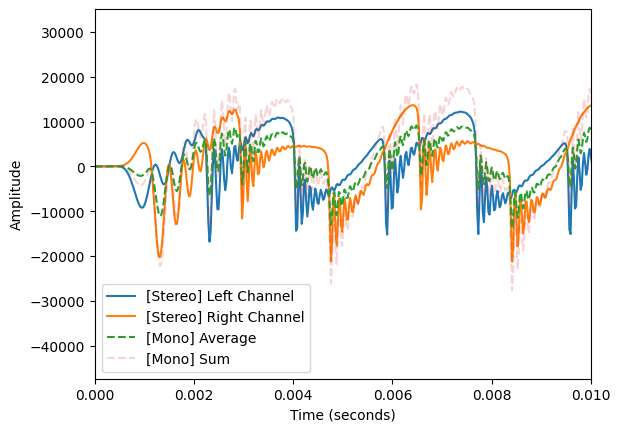

In [4]:
# Plot the waveforms
time = np.arange(len(waveform_reshaped)) / sampling_rate
plt.plot(time, waveform_reshaped[:, 0], label = '[Stereo] Left Channel')
plt.plot(time, waveform_reshaped[:, 1], label = '[Stereo] Right Channel')
plt.plot(time, waveform_mono_avg, label = '[Mono] Average', linestyle = 'dashed')
plt.plot(time, waveform_mono_sum, label = '[Mono] Sum', linestyle = 'dashed', alpha=0.2)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.01)
plt.legend()
plt.show()

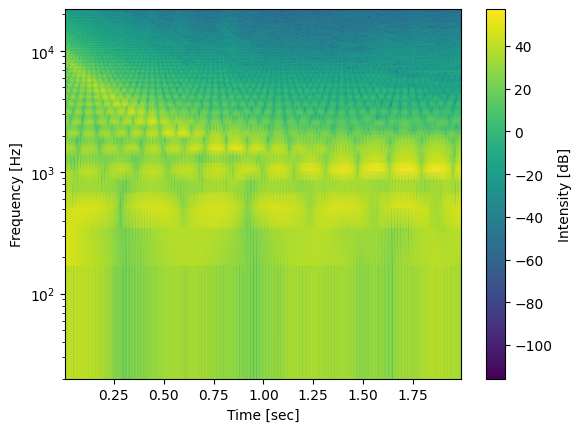

In [8]:
# Plot the spectrogram using our custom AudioProcessor class
audio = AudioProcessor(audio_sample=waveform_mono_avg, sampling_freq=sampling_rate)
audio.calculate_spectrogram()

# Call plotting functions
plt.pcolormesh(audio.spectrogram.time, audio.spectrogram.frequency, audio.spectrogram.decibels, shading='gouraud')
plt.yscale('log')
plt.ylim(bottom=20, top=sampling_rate/2) # 20 Hz is lower limit of human hearing
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.show()

In [12]:
print(audio.spectrogram.frequency.shape)

(129,)
